<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lesson_7_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape=  (209, 64, 64, 3)
X_test.shape=  (50, 64, 64, 3)
Y_train.shape=  (209, 1)
Y_test.shape=  (50, 1)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x_flatten shape: (209, 12288)
test_set_x_flatten shape: (50, 12288)
sanity check after reshaping: [17 31 56 22 33]
sigmoid([0, 2]) = [0.5        0.88079708]
w = [[0. 0.]]
b = 0
dJ_dw = [[1.33178935 3.06173906]]
dJ_db = 0.001455578136784208
cost = 6.6348786527278865
w = [[ 0.08006006 -0.02399336]]
b = 1.9060971483059892
dw = [[0.62090316 1.19256883]]
db = 0.2084129285706479
predictions = 
[[1]
 [1]
 [0]]
Cost after iteration 0: 0.693147
Cost after iteration 100: 1.413557
Cost after iteration 200: 0.649230
Cost after iteration 300: 1.038767
Cost after iteration 400: 0.784929
Cost after iteration 500: 0.553968
Cost after iteration 600: 0.364912
Cost after iteration 700: 0.232325
Cost after iteration 800: 0.179712


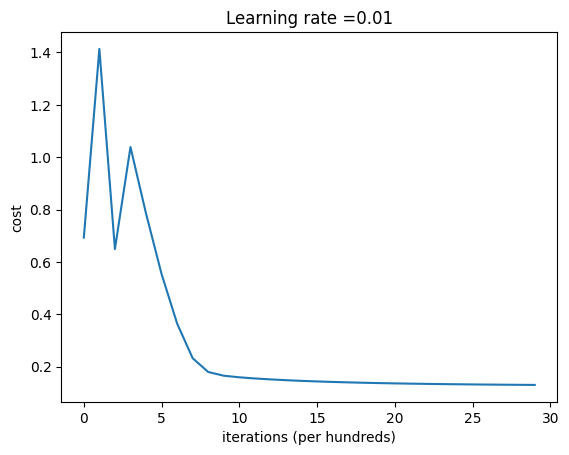

In [12]:
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  h5py  # загальний пакет для взаємодії з набором даних, що зберігається у файлі H5.
import  os

cwd =  os.getcwd ()
path = os.path.join ( cwd , 'data' )

def load_dataset():
    file_name = os.path.join(path, 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:])  # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:])  # your train set labels

    file_name = os.path.join(path, 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:])  # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = ['non-cat', 'cat']

    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    return X_train, Y_train, X_test, Y_test, classes

X_train,Y_train, X_test, Y_test, classes = load_dataset()
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('Y_train.shape= ',Y_train.shape)
print ('Y_test.shape= ',Y_test.shape)

# YOUR_CODE.   get m_train, num_px and m_test
# START_CODE
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]
# END_CODE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

# YOUR_CODE. Reshape the training and test set to shape (number_of_samples,  num_px*num_px*3)
# START_CODE
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)
# END_CODE

print ("train_set_x_flatten shape: {}".format(X_train_flatten.shape))
print ("test_set_x_flatten shape: {}".format(X_test_flatten.shape))
print ("sanity check after reshaping: {}".format(X_train_flatten[0, :5]))

X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.


def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """

    # YOUR_CODE. Implement sigmoid function
    # START_CODE
    g = 1 / (1 + np.exp(-z))
    # END_CODE

    return g

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1,dim) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (1,dim)
    b -- initialized scalar (corresponds to the bias)
    """

    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros.
    # START_CODE
    w = np.zeros((1, dim))
    b = 0
    # END_CODE

    assert (w.shape == (1, dim))
    assert (isinstance(b, float) or isinstance(b, int))

    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


# GRADED FUNCTION: propagate
def propagate(w, b, X, Y, C=1):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[0]

    # YOUR_CODE.  implement forward propagation
    # START_CODE
    Z = np.dot(X, w.T) + b
    A = sigmoid(Z)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + (1/(2*C*m)) * np.sum(np.square(w))
    # END_CODE

    # YOUR_CODE.  Implement Backward propahation
    # START_CODE
    dJ_dw = (1 / m) * np.dot((A - Y).T, X) + (1 / (C * m)) * w
    dJ_db = (1 / m) * np.sum((A-Y))
    # END_CODE

    assert (dJ_dw.shape == w.shape)
    assert (dJ_db.dtype == float)
    assert (cost.dtype == float)

    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}

    return grads, cost


w, b, X, Y = np.array([[1., 2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]]).T
grads, cost = propagate(w, b, X, Y)
print ("dJ_dw = " + str(grads["dJ_dw"]))
print ("dJ_db = " + str(grads["dJ_db"]))
print ("cost = " + str(cost))



def optimize(w, b, X, Y, num_iterations, learning_rate, C=1, verbose=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []  # keep history for plotting if necessary

    for i in range(num_iterations):

        # YOUR_CODE.  Call to compute cost and gradient
        # START_CODE
        C = float(C)
        grads, cost = propagate(w, b, X, Y, C)
        # END_CODE

        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]

        # YOUR_CODE.  Update paramaters
        # START_CODE
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db
        # END_CODE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}

    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, verbose = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dJ_dw"]))
print ("db = " + str(grads["dJ_db"]))


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w - weights, a numpy array of size (1,num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)

    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m, n = X.shape
    assert (w.shape == (1, n))

    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    # START_CODE
    A = sigmoid(np.dot(X, w.T) + b)
    # END_CODE

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1
    # START_CODE
    Y_prediction = (A > 0.5).astype(int)
    # END_CODE

    assert (Y_prediction.shape == (m, 1))

    return Y_prediction


w = np.array([[0.1124579],[0.23106775]]).T
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]).T
print ("predictions = \n{}".format (predict(w, b, X)))


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, verbose=False, C=1):
    """
    Builds the logistic regression model by calling the functions implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter

    Returns:
    res -- dictionary containing information about the model.
    """

    # YOUR_CODE.
    # START_CODE

    # initialize parameters
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)

    # run gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)

    # retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # predict test/train set examples
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # END_CODE

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))

    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test,
           'Y_prediction_train': Y_prediction_train,
           'w': w,
           'b': b,
           'learning_rate': learning_rate,
           'num_iterations': num_iterations,
           'C': C
           }

    return res

res = model(X_train= X_train_scaled,
            Y_train=Y_train,
            X_test=X_test_scaled,
            Y_test= Y_test,
            num_iterations = 3000,
            learning_rate = 0.01,
            verbose = True,
            C = 0.3 # 0.6 is still overfitting,   0.3  is low value to keep the test accuracy ashigh as possible
           )

costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()
